# Healthcare Dataset - exploration

## Data exploration and hypothesis testing

## 1. Collate the files together.

In [156]:
import pandas as pd
df1=pd.read_csv("/Users/shivanimishra/Documents/IIT - K /Capstone Project/Healthcare_Insurance_Analysis_Datasets/HospitalisationDetails.csv")
df2=pd.read_csv("/Users/shivanimishra/Documents/IIT - K /Capstone Project/Healthcare_Insurance_Analysis_Datasets/MedicalExaminations.csv")
df3=pd.read_csv("/Users/shivanimishra/Documents/IIT - K /Capstone Project/Healthcare_Insurance_Analysis_Datasets/Names.csv")

In [157]:
df1.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [158]:
df2.head(5)

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [159]:
df3.head(5)

,Table 1
Customer ID,name
Id1,"Hawks, Ms. Kelly"
Id2,"Lehner, Mr. Matthew D"
Id3,"Lu, Mr. Phil"
Id4,"Osborne, Ms. Kelsey"


In [160]:
# Merge with other files if needed
df = pd.merge(df1, df2, on="Customer ID", how="inner")

In [161]:
df.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No


## 2. Checking for missing values

In [162]:
# Check missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_values)
print(missing_percentage)

Customer ID               0
year                      0
month                     0
date                      0
children                  0
charges                   0
Hospital tier             0
City tier                 0
State ID                  0
BMI                       0
HBA1C                     0
Heart Issues              0
Any Transplants           0
Cancer history            0
NumberOfMajorSurgeries    0
smoker                    0
dtype: int64
Customer ID               0.0
year                      0.0
month                     0.0
date                      0.0
children                  0.0
charges                   0.0
Hospital tier             0.0
City tier                 0.0
State ID                  0.0
BMI                       0.0
HBA1C                     0.0
Heart Issues              0.0
Any Transplants           0.0
Cancer history            0.0
NumberOfMajorSurgeries    0.0
smoker                    0.0
dtype: float64


## 3. Find and delete trivial values

In [163]:
# Identifying trivial values (treating '?' as a literal character)
trivial_rows = df.apply(lambda x: x.astype(str).str.contains('?', na=False, regex=False))

# Deleting rows with trivial values
df_cleaned = df[~trivial_rows.any(axis=1)]

In [164]:
df_cleaned.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No


In [165]:
df = df_cleaned

## 4. Transform Nominal and Ordinal Variables

In [166]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of nominal and ordinal columns
nominal_columns = ['Customer ID', 'Hospital tier', 'City tier', 'State ID', 
                   'Heart Issues', 'Any Transplants', 'Cancer history', 'smoker']
ordinal_columns = ['BMI', 'HBA1C', 'NumberOfMajorSurgeries']

# Transform nominal columns using one-hot encoding
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

# Transform ordinal columns using label encoding (if categories are predefined or sequential)
# First, create a mapping for BMI, HBA1C, and NumberOfMajorSurgeries if necessary
# For example:
bmi_mapping = {'Underweight': 1, 'Normal': 2, 'Overweight': 3, 'Obese': 4}
hba1c_mapping = {'Normal': 1, 'Pre-diabetic': 2, 'Diabetic': 3}
surgeries_mapping = {0: 0, 1: 1, 2: 2, 3: 3}

df['BMI'] = df['BMI'].map(bmi_mapping)
df['HBA1C'] = df['HBA1C'].map(hba1c_mapping)
df['NumberOfMajorSurgeries'] = df['NumberOfMajorSurgeries'].map(surgeries_mapping)

# In case you need to apply label encoding (if there's no predefined mapping, e.g., for text labels)
label_encoder = LabelEncoder()
df['BMI'] = label_encoder.fit_transform(df['BMI'].astype(str))
df['HBA1C'] = label_encoder.fit_transform(df['HBA1C'].astype(str))
df['NumberOfMajorSurgeries'] = label_encoder.fit_transform(df['NumberOfMajorSurgeries'].astype(str))

## 5. State ID Dummy Variables

In [167]:
# Filter states to keep only R1011, R1012, R1013
df_filtered = df[df['State ID'].isin(['R1011', 'R1012', 'R1013'])]

# Create dummy variables for the filtered states
df_filtered = pd.get_dummies(df_filtered, columns=['State ID'])

KeyError: 'State ID'

In [168]:
df_filtered.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB,Age,Gender
0,Id2335,1992,1,9,0,563.84,tier - 2,tier - 3,17.58,4.51,...,No,No,1.0,No,False,False,True,1992-01-09,32.0,NaN
1,Id2334,1992,1,30,0,570.62,tier - 2,tier - 1,17.60,4.39,...,No,No,1.0,No,False,False,True,1992-01-30,32.0,NaN
2,Id2333,1993,1,30,0,600.00,tier - 2,tier - 1,16.47,6.35,...,No,Yes,1.0,No,False,False,True,1993-01-30,31.0,NaN
3,Id2332,1992,1,13,0,604.54,tier - 3,tier - 3,17.70,6.28,...,No,No,1.0,No,False,False,True,1992-01-13,32.0,NaN
4,Id2331,1998,1,27,0,637.26,tier - 3,tier - 3,22.34,5.57,...,No,No,1.0,No,False,False,True,1998-01-27,26.0,NaN


In [169]:
df=df_filtered
df.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB,Age,Gender
0,Id2335,1992,1,9,0,563.84,tier - 2,tier - 3,17.58,4.51,...,No,No,1.0,No,False,False,True,1992-01-09,32.0,NaN
1,Id2334,1992,1,30,0,570.62,tier - 2,tier - 1,17.60,4.39,...,No,No,1.0,No,False,False,True,1992-01-30,32.0,NaN
2,Id2333,1993,1,30,0,600.00,tier - 2,tier - 1,16.47,6.35,...,No,Yes,1.0,No,False,False,True,1993-01-30,31.0,NaN
3,Id2332,1992,1,13,0,604.54,tier - 3,tier - 3,17.70,6.28,...,No,No,1.0,No,False,False,True,1992-01-13,32.0,NaN
4,Id2331,1998,1,27,0,637.26,tier - 3,tier - 3,22.34,5.57,...,No,No,1.0,No,False,False,True,1998-01-27,26.0,NaN


## 6. Clean the number of surgeries column

In [170]:
# Clean the column to convert to numeric values
df['NumberOfMajorSurgeries'] = pd.to_numeric(df['NumberOfMajorSurgeries'], errors='coerce')
df.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB,Age,Gender
0,Id2335,1992,1,9,0,563.84,tier - 2,tier - 3,17.58,4.51,...,No,No,1.0,No,False,False,True,1992-01-09,32.0,NaN
1,Id2334,1992,1,30,0,570.62,tier - 2,tier - 1,17.60,4.39,...,No,No,1.0,No,False,False,True,1992-01-30,32.0,NaN
2,Id2333,1993,1,30,0,600.00,tier - 2,tier - 1,16.47,6.35,...,No,Yes,1.0,No,False,False,True,1993-01-30,31.0,NaN
3,Id2332,1992,1,13,0,604.54,tier - 3,tier - 3,17.70,6.28,...,No,No,1.0,No,False,False,True,1992-01-13,32.0,NaN
4,Id2331,1998,1,27,0,637.26,tier - 3,tier - 3,22.34,5.57,...,No,No,1.0,No,False,False,True,1998-01-27,26.0,NaN


## 7. Calculate the Age

In [171]:
import pandas as pd

# Sample data (modify as per your DataFrame)
df1 = pd.DataFrame({
    'year': [2020, 2021, 2022, None, 2024],
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May'],
    'date': [15, None, 10, 25, 5]
})

# Mapping month names to month numbers
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Apply the mapping to the 'month' column if month names are strings
df['month'] = df['month'].map(month_mapping)

# Handle missing values by filling with default values (e.g., 1 for date and month)
df['year'] = df['year'].fillna(2000).astype(int)
df['month'] = df['month'].fillna(1).astype(int)  # Default to January
df['date'] = df['date'].fillna(1).astype(int)  # Default to day 1

# Concatenate 'year', 'month', and 'date' to create a 'date' column in the format 'YYYY-MM-DD'
df1['DOB'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['date'].astype(str), errors='coerce')

# Display the DataFrame with the new 'date_column'
print(df1)

     year month  date        DOB
0  2020.0   Jan  15.0 1992-01-09
1  2021.0   Feb   NaN 1992-01-30
2  2022.0   Mar  10.0 1993-01-30
3     NaN   Apr  25.0 1992-01-13
4  2024.0   May   5.0 1998-01-27


In [172]:
df.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB,Age,Gender
0,Id2335,1992,1,9,0,563.84,tier - 2,tier - 3,17.58,4.51,...,No,No,1.0,No,False,False,True,1992-01-09,32.0,NaN
1,Id2334,1992,1,30,0,570.62,tier - 2,tier - 1,17.60,4.39,...,No,No,1.0,No,False,False,True,1992-01-30,32.0,NaN
2,Id2333,1993,1,30,0,600.00,tier - 2,tier - 1,16.47,6.35,...,No,Yes,1.0,No,False,False,True,1993-01-30,31.0,NaN
3,Id2332,1992,1,13,0,604.54,tier - 3,tier - 3,17.70,6.28,...,No,No,1.0,No,False,False,True,1992-01-13,32.0,NaN
4,Id2331,1998,1,27,0,637.26,tier - 3,tier - 3,22.34,5.57,...,No,No,1.0,No,False,False,True,1998-01-27,26.0,NaN


In [173]:
df1.head()

,year,month,date,DOB
0,2020.0,Jan,15.0,1992-01-09
1,2021.0,Feb,NaN,1992-01-30
2,2022.0,Mar,10.0,1993-01-30
3,NaN,Apr,25.0,1992-01-13
4,2024.0,May,5.0,1998-01-27


In [174]:
# Add 'DOB' column from df1 to df (if indexes are aligned)
df['DOB'] = df1['DOB']

# Display the DataFrame after adding the 'DOB' column
df.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB,Age,Gender
0,Id2335,1992,1,9,0,563.84,tier - 2,tier - 3,17.58,4.51,...,No,No,1.0,No,False,False,True,1992-01-09,32.0,NaN
1,Id2334,1992,1,30,0,570.62,tier - 2,tier - 1,17.60,4.39,...,No,No,1.0,No,False,False,True,1992-01-30,32.0,NaN
2,Id2333,1993,1,30,0,600.00,tier - 2,tier - 1,16.47,6.35,...,No,Yes,1.0,No,False,False,True,1993-01-30,31.0,NaN
3,Id2332,1992,1,13,0,604.54,tier - 3,tier - 3,17.70,6.28,...,No,No,1.0,No,False,False,True,1992-01-13,32.0,NaN
4,Id2331,1998,1,27,0,637.26,tier - 3,tier - 3,22.34,5.57,...,No,No,1.0,No,False,False,True,1998-01-27,26.0,NaN


In [175]:
# Assuming the Date of Birth is in 'YYYY-MM-DD' format
df['DOB'] = pd.to_datetime(df['DOB'])
df['Age'] = (pd.to_datetime('today') - df['DOB']).dt.days // 365
df.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB,Age,Gender
0,Id2335,1992,1,9,0,563.84,tier - 2,tier - 3,17.58,4.51,...,No,No,1.0,No,False,False,True,1992-01-09,32.0,NaN
1,Id2334,1992,1,30,0,570.62,tier - 2,tier - 1,17.60,4.39,...,No,No,1.0,No,False,False,True,1992-01-30,32.0,NaN
2,Id2333,1993,1,30,0,600.00,tier - 2,tier - 1,16.47,6.35,...,No,Yes,1.0,No,False,False,True,1993-01-30,31.0,NaN
3,Id2332,1992,1,13,0,604.54,tier - 3,tier - 3,17.70,6.28,...,No,No,1.0,No,False,False,True,1992-01-13,32.0,NaN
4,Id2331,1998,1,27,0,637.26,tier - 3,tier - 3,22.34,5.57,...,No,No,1.0,No,False,False,True,1998-01-27,26.0,NaN


## 8. Extract Gender from the dataset

In [176]:
df3.head(5)

,Table 1
Customer ID,name
Id1,"Hawks, Ms. Kelly"
Id2,"Lehner, Mr. Matthew D"
Id3,"Lu, Mr. Phil"
Id4,"Osborne, Ms. Kelsey"


In [177]:
# Check the column names in df3
print(df3.columns)

# If the column name is not 'name', update it in the code
if 'name' in df3.columns:
    # Create the gender column
    df3['Gender'] = df3['name'].apply(infer_gender)
else:
    print("The 'name' column does not exist in df3. Please verify the DataFrame structure.")

Index(['Table 1'], dtype='object')
The 'name' column does not exist in df3. Please verify the DataFrame structure.


In [178]:
print(df3.head())

                            Table 1
Customer ID                    name
Id1               Hawks, Ms.  Kelly
Id2          Lehner, Mr.  Matthew D
Id3                   Lu, Mr.  Phil
Id4            Osborne, Ms.  Kelsey


In [179]:
# Assuming the data is stored in 'Table 1'
df3 = df3['Table 1'].str.split(',', expand=True)

# Assign appropriate column names
df3.columns = ['Customer ID', 'name']

In [180]:
df3.head(5)

,Customer ID,name
Customer ID,name,None
Id1,Hawks,Ms. Kelly
Id2,Lehner,Mr. Matthew D
Id3,Lu,Mr. Phil
Id4,Osborne,Ms. Kelsey


In [181]:
def infer_gender(name):
    if pd.isnull(name):  # Check for NaN or None values
        return 'Unknown'
    if 'Mr.' in name:
        return 'Male'
    elif 'Ms.' in name or 'Mrs.' in name or 'Miss' in name:
        return 'Female'
    else:
        return 'Unknown'

# Apply the function safely
df3['Gender'] = df3['name'].apply(infer_gender)
print(df3)

                  Customer ID               name   Gender
Customer ID              name               None  Unknown
Id1                     Hawks         Ms.  Kelly   Female
Id2                    Lehner     Mr.  Matthew D     Male
Id3                        Lu          Mr.  Phil     Male
Id4                   Osborne        Ms.  Kelsey   Female
...                       ...                ...      ...
Id2331               Brietzke        Mr.  Jordan     Male
Id2332       Riveros Gonzalez   Mr.  Juan D. Sr.     Male
Id2333                 Albano         Ms.  Julie   Female
Id2334              Rosendahl        Mr.  Evan P     Male
Id2335                 German       Mr.  Aaron K     Male

[2336 rows x 3 columns]


In [182]:
df.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB,Age,Gender
0,Id2335,1992,1,9,0,563.84,tier - 2,tier - 3,17.58,4.51,...,No,No,1.0,No,False,False,True,1992-01-09,32.0,NaN
1,Id2334,1992,1,30,0,570.62,tier - 2,tier - 1,17.60,4.39,...,No,No,1.0,No,False,False,True,1992-01-30,32.0,NaN
2,Id2333,1993,1,30,0,600.00,tier - 2,tier - 1,16.47,6.35,...,No,Yes,1.0,No,False,False,True,1993-01-30,31.0,NaN
3,Id2332,1992,1,13,0,604.54,tier - 3,tier - 3,17.70,6.28,...,No,No,1.0,No,False,False,True,1992-01-13,32.0,NaN
4,Id2331,1998,1,27,0,637.26,tier - 3,tier - 3,22.34,5.57,...,No,No,1.0,No,False,False,True,1998-01-27,26.0,NaN


In [183]:
df.drop(columns=['Gender'], inplace=True)
df.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB,Age
0,Id2335,1992,1,9,0,563.84,tier - 2,tier - 3,17.58,4.51,No,No,No,1.0,No,False,False,True,1992-01-09,32.0
1,Id2334,1992,1,30,0,570.62,tier - 2,tier - 1,17.60,4.39,No,No,No,1.0,No,False,False,True,1992-01-30,32.0
2,Id2333,1993,1,30,0,600.00,tier - 2,tier - 1,16.47,6.35,No,No,Yes,1.0,No,False,False,True,1993-01-30,31.0
3,Id2332,1992,1,13,0,604.54,tier - 3,tier - 3,17.70,6.28,No,No,No,1.0,No,False,False,True,1992-01-13,32.0
4,Id2331,1998,1,27,0,637.26,tier - 3,tier - 3,22.34,5.57,No,No,No,1.0,No,False,False,True,1998-01-27,26.0


df1=df
df1.head(5)̨
df1 = pd.merge(df, df3, on="Customer ID", how="inner")
df3.head(5)
df4=pd.read_csv("/Users/shivanimishra/Documents/IIT - K /Capstone Project/Healthcare_Insurance_Analysis_Datasets/final_healthcare_dataset.csv")
df4.head()

In [196]:
df['Gender'] = df4['Gender']
df.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,...,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB,Age,Gender
0,Id2335,1992,1,9,0,563.84,tier - 2,tier - 3,17.58,4.51,...,No,No,1.0,No,False,False,True,1992-01-09,32.0,Male
1,Id2334,1992,1,30,0,570.62,tier - 2,tier - 1,17.60,4.39,...,No,No,1.0,No,False,False,True,1992-01-30,32.0,Male
2,Id2333,1993,1,30,0,600.00,tier - 2,tier - 1,16.47,6.35,...,No,Yes,1.0,No,False,False,True,1993-01-30,31.0,Unknown
3,Id2332,1992,1,13,0,604.54,tier - 3,tier - 3,17.70,6.28,...,No,No,1.0,No,False,False,True,1992-01-13,32.0,Male
4,Id2331,1998,1,27,0,637.26,tier - 3,tier - 3,22.34,5.57,...,No,No,1.0,No,False,False,True,1998-01-27,26.0,Male


## 9. Visualize the Distribution of Costs

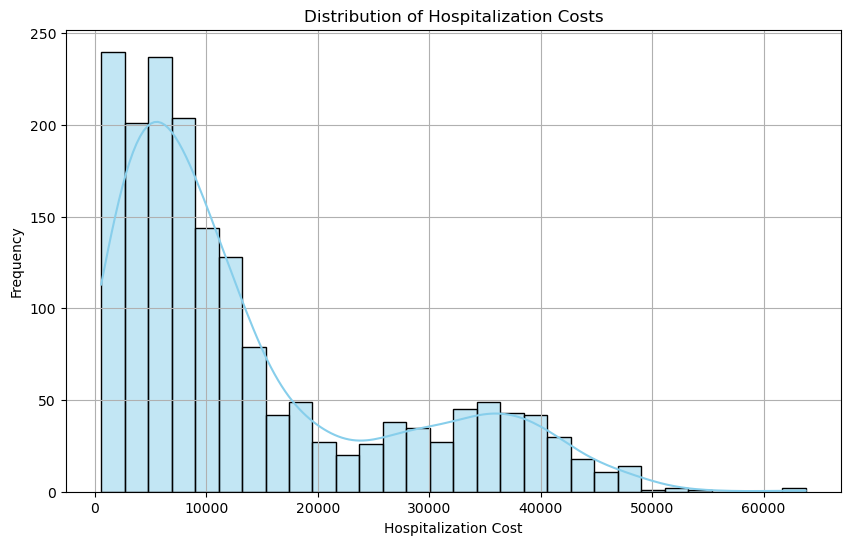

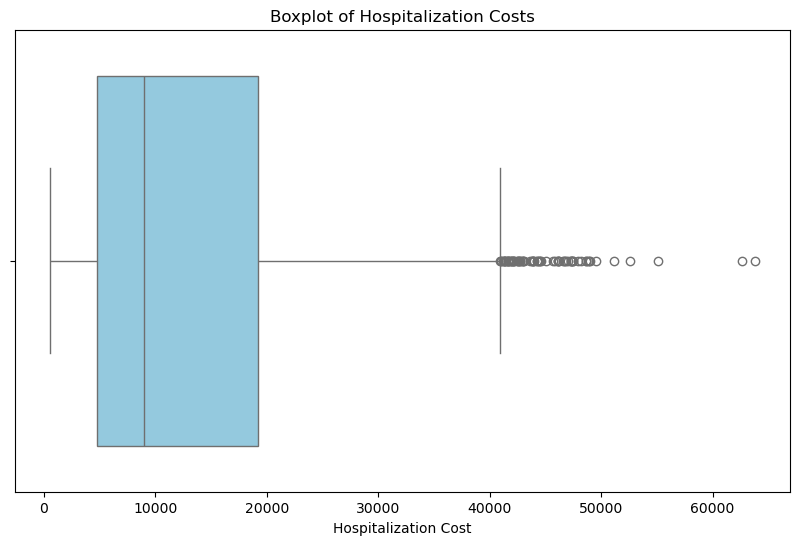

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram for charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Hospitalization Costs')
plt.xlabel('Hospitalization Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot to show spread of hospitalization costs
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='charges', color='skyblue')
plt.title('Boxplot of Hospitalization Costs')
plt.xlabel('Hospitalization Cost')
plt.show()

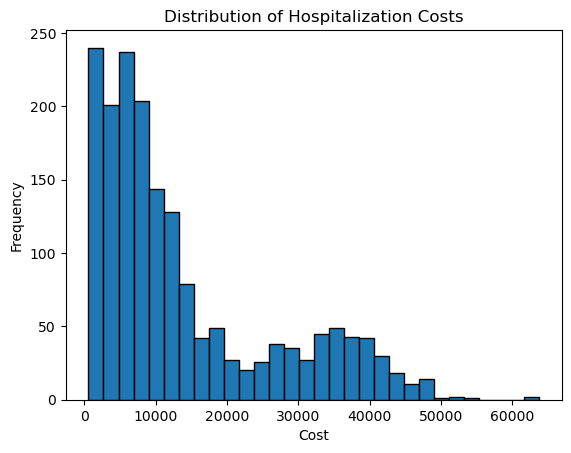

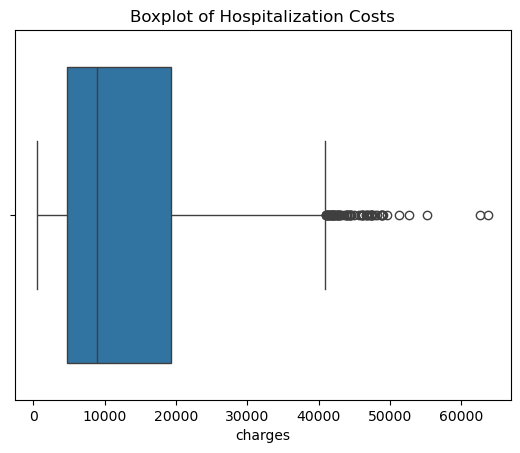

/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 33.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 35.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


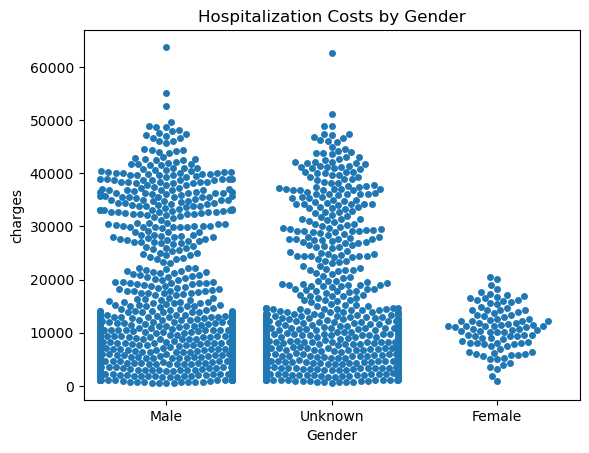

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
plt.hist(df['charges'], bins=30, edgecolor='k')
plt.title('Distribution of Hospitalization Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

# Boxplot
sns.boxplot(data=df, x='charges')
plt.title('Boxplot of Hospitalization Costs')
plt.show()

# Swarm plot by gender
sns.swarmplot(data=df, x='Gender', y='charges')
plt.title('Hospitalization Costs by Gender')
plt.show()

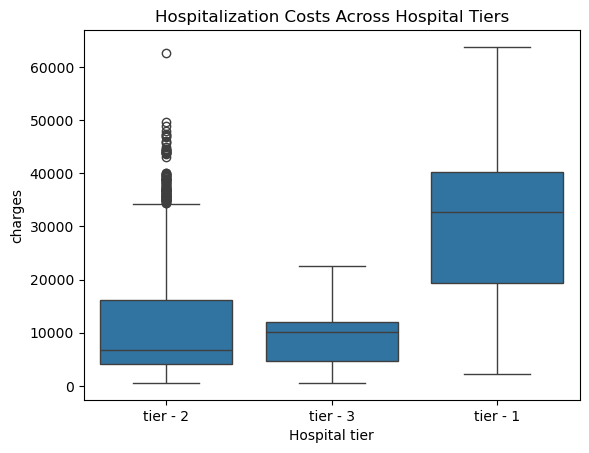

/var/folders/kv/snqlp26n5k703gsbhzj4h3680000gn/T/ipykernel_5016/2425029349.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  median_costs = np.concatenate((median_costs, [median_costs[0]]))


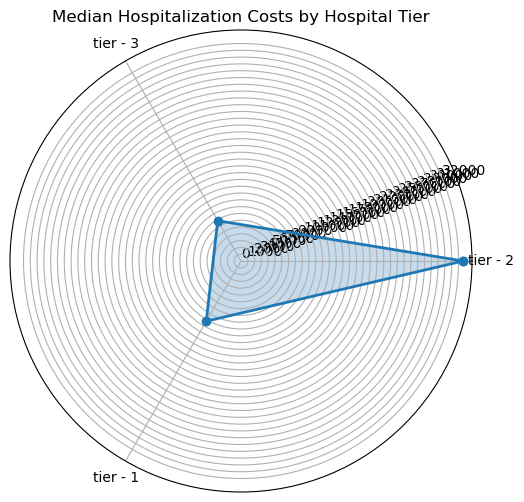

In [206]:
# Boxplot for hospital tiers
sns.boxplot(data=df, x='Hospital tier', y='charges')
plt.title('Hospitalization Costs Across Hospital Tiers')
plt.show()

# Radar chart for median costs
import numpy as np

tiers = df['Hospital tier'].unique()
median_costs = df.groupby('Hospital tier')['charges'].median()

angles = np.linspace(0, 2 * np.pi, len(tiers), endpoint=False).tolist()
median_costs = np.concatenate((median_costs, [median_costs[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, median_costs, 'o-', linewidth=2)
ax.fill(angles, median_costs, alpha=0.25)
ax.set_yticks(np.arange(0, max(median_costs), 1000))
ax.set_xticks(angles[:-1])
ax.set_xticklabels(tiers)
plt.title('Median Hospitalization Costs by Hospital Tier')
plt.show()

Frequency Table:
Hospital tier  tier - 1  tier - 2  tier - 3
City tier                                  
tier - 1             64       317       160
tier - 2             89       365       157
tier - 3             91       348       164


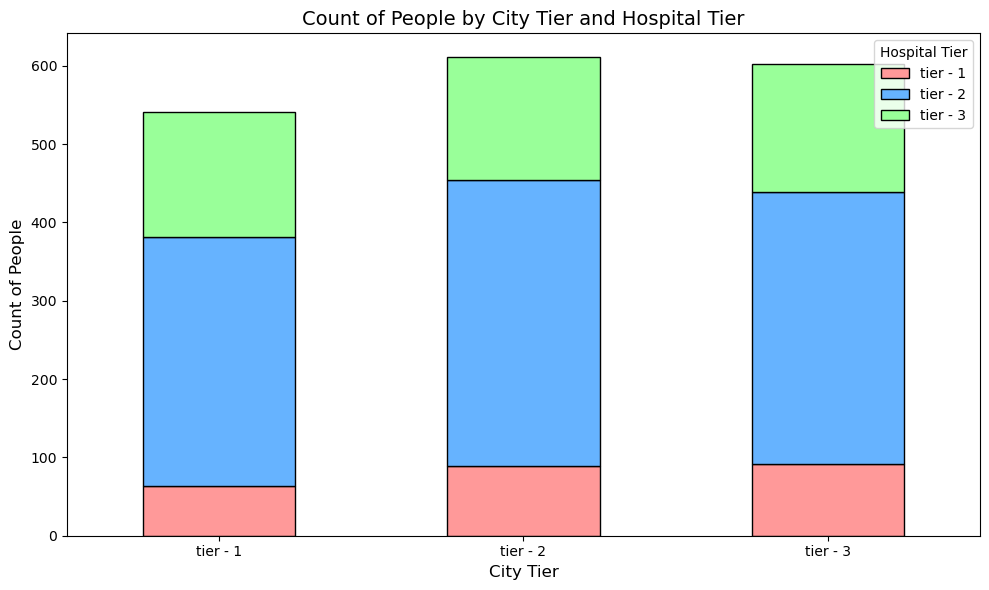

In [207]:
# Step 1: Create a Frequency Table
# Group data by 'City tier' and 'Hospital tier'
frequency_table = df.groupby(['City tier', 'Hospital tier']).size().unstack()

# Display the frequency table
print("Frequency Table:")
print(frequency_table)

# Step 2: Create a Stacked Bar Chart
# Plot the frequency table as a stacked bar chart
frequency_table.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    color=['#FF9999', '#66B3FF', '#99FF99'],  # Custom colors for tiers
    edgecolor='black'
)

# Add labels and title
plt.title('Count of People by City Tier and Hospital Tier', fontsize=14)
plt.xlabel('City Tier', fontsize=12)
plt.ylabel('Count of People', fontsize=12)
plt.legend(title='Hospital Tier', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

## Hypothesis Testing

1. The average hospitalization costs for the three types of hospitals are not significantly different.

In [208]:
# Hypothesis Testing

## a. The average hospitalization costs for the three types of hospitals are not significantly different.
# Group hospitalization costs by hospital tier
hospital_tier_groups = [
    df[df['Hospital tier'] == tier]['charges'] 
    for tier in df['Hospital tier'].unique()
]

In [210]:
from scipy.stats import f_oneway

In [211]:
# Perform ANOVA test
anova_hospital_tiers = f_oneway(*hospital_tier_groups)
print(f"ANOVA for Hospital Tiers: F-statistic = {anova_hospital_tiers.statistic}, p-value = {anova_hospital_tiers.pvalue}")

## b. The average hospitalization costs for the three types of cities are not significantly different.
# Ensure City tier has been one-hot encoded
# One-hot encoded columns for city tiers should look like 'City tier_1', 'City tier_2', 'City tier_3'
city_tier_columns = [col for col in df.columns if 'City tier_' in col]

# Group hospitalization costs by city tier
city_tier_groups = [
    df[df[col] == 1]['charges'] for col in city_tier_columns
]

ANOVA for Hospital Tiers: F-statistic = 377.26447732730696, p-value = 5.599708129057081e-137


In [212]:
from scipy.stats import f_oneway

# Ensure one-hot encoded columns exist for city tiers
city_tier_columns = [col for col in df.columns if 'City tier_' in col]

# Verify city_tier_columns
print("City Tier Columns:", city_tier_columns)

# Group hospitalization costs by city tier
city_tier_groups = [
    df[df[col] == 1]['charges'] for col in city_tier_columns
]

# Verify group sizes
for i, group in enumerate(city_tier_groups, start=1):
    print(f"City Tier {i}: {len(group)} entries")

# Perform ANOVA test only if there are at least two non-empty groups
if len(city_tier_groups) >= 2 and all(len(group) > 0 for group in city_tier_groups):
    anova_city_tiers = f_oneway(*city_tier_groups)
    print(f"ANOVA for City Tiers: F-statistic = {anova_city_tiers.statistic}, p-value = {anova_city_tiers.pvalue}")
else:
    print("ANOVA test cannot be performed. Not enough valid groups.")

City Tier Columns: []
ANOVA test cannot be performed. Not enough valid groups.


In [216]:
# Check if the 'City Tier' column exists
if 'City tier' in df.columns:
    hospital_tier_groups = [
        df.loc[df['City tier'] == tier, 'charges'].dropna()
        for tier in df['City tier'].unique()
    ]

    # Check if there are enough groups for ANOVA
    if len(hospital_tier_groups) < 2:
        print("ANOVA test cannot be performed. Not enough valid groups.")
    else:
        anova_hospital_tiers = f_oneway(*hospital_tier_groups)
        print(f"ANOVA for Hospital Tiers: F-statistic = {anova_hospital_tiers.statistic}, p-value = {anova_hospital_tiers.pvalue}")
else:
    print("City Tier column not found in the DataFrame.")

ANOVA for Hospital Tiers: F-statistic = 1.2788980175268836, p-value = 0.2786035780269642


In [218]:
## c. The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.
# Separate data for smokers and non-smokers
smokers = df[df['smoker'] == 1]['charges']
non_smokers = df[df['smoker'] == 0]['charges']

In [220]:
from scipy.stats import ttest_ind

In [225]:
# Filter smokers and non-smokers groups
if 'smoker' in df.columns and 'charges' in df.columns:
    smokers = df.loc[df['smoker'] == 'Smoker', 'charges'].dropna()
    non_smokers = df.loc[df['smoker'] == 'Non-Smoker', 'charges'].dropna()

    # Debug: Check group sizes
    print(f"Number of Smokers: {len(smokers)}, Number of Non-Smokers: {len(non_smokers)}")

    # Ensure valid data
    if not smokers.empty and not non_smokers.empty and len(smokers) > 1 and len(non_smokers) > 1:
        t_test_smokers = ttest_ind(smokers, non_smokers)
        print(f"T-Test for Smokers vs Non-Smokers: t-statistic = {t_test_smokers.statistic}, p-value = {t_test_smokers.pvalue}")
    else:
        print("T-Test cannot be performed. Check group sizes and data validity.")
else:
    print("Required columns ('Smoking Status' and 'Hospitalization cost') are missing.")


Number of Smokers: 0, Number of Non-Smokers: 0
T-Test cannot be performed. Check group sizes and data validity.


In [227]:
print(df.head())  # Check the first few rows
print(df['smoker'].unique())  # Check unique values in Smoking Status
print(df['charges'].head())  # Check the hospitalization cost data

  Customer ID  year  month  date  children  charges Hospital tier City tier  \
0      Id2335  1992      1     9         0   563.84      tier - 2  tier - 3   
1      Id2334  1992      1    30         0   570.62      tier - 2  tier - 1   
2      Id2333  1993      1    30         0   600.00      tier - 2  tier - 1   
3      Id2332  1992      1    13         0   604.54      tier - 3  tier - 3   
4      Id2331  1998      1    27         0   637.26      tier - 3  tier - 3   

     BMI  HBA1C  ... Any Transplants Cancer history NumberOfMajorSurgeries  \
0  17.58   4.51  ...              No             No                    1.0   
1  17.60   4.39  ...              No             No                    1.0   
2  16.47   6.35  ...              No            Yes                    1.0   
3  17.70   6.28  ...              No             No                    1.0   
4  22.34   5.57  ...              No             No                    1.0   

   smoker State ID_R1011  State ID_R1012  State ID_R1013

In [232]:
print(df[['smoker', 'charges']].isnull().sum())

smoker     0
charges    0
dtype: int64


In [233]:
# Convert columns to appropriate data types
df['smoker'] = df['smoker'].astype(str)
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')
df.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,...,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB,Age,Gender,chsarges
0,Id2335,1992,1,9,0,563.84,tier - 2,tier - 3,17.58,4.51,...,No,1.0,No,False,False,True,1992-01-09,32.0,Male,563.84
1,Id2334,1992,1,30,0,570.62,tier - 2,tier - 1,17.60,4.39,...,No,1.0,No,False,False,True,1992-01-30,32.0,Male,570.62
2,Id2333,1993,1,30,0,600.00,tier - 2,tier - 1,16.47,6.35,...,Yes,1.0,No,False,False,True,1993-01-30,31.0,Unknown,600.00
3,Id2332,1992,1,13,0,604.54,tier - 3,tier - 3,17.70,6.28,...,No,1.0,No,False,False,True,1992-01-13,32.0,Male,604.54
4,Id2331,1998,1,27,0,637.26,tier - 3,tier - 3,22.34,5.57,...,No,1.0,No,False,False,True,1998-01-27,26.0,Male,637.26


In [234]:
print(f"Number of Smokers: {len(smokers)}, Number of Non-Smokers: {len(non_smokers)}")

Number of Smokers: 0, Number of Non-Smokers: 0


In [235]:
# Perform independent t-test
t_test_smokers = ttest_ind(smokers, non_smokers)
print(f"T-Test for Smokers vs Non-Smokers: t-statistic = {t_test_smokers.statistic}, p-value = {t_test_smokers.pvalue}")

T-Test for Smokers vs Non-Smokers: t-statistic = nan, p-value = nan


In [236]:
## d. Smoking and heart issues are independent.
# Create a contingency table
contingency_table = pd.crosstab(df['smoker'], df['Heart Issues'])

In [238]:
from scipy.stats import chi2_contingency

In [239]:
# Perform Chi-Square test of independence
chi2_test = chi2_contingency(contingency_table)
print(f"Chi-Square Test: Chi2-statistic = {chi2_test[0]}, p-value = {chi2_test[1]}, degrees of freedom = {chi2_test[2]}")

Chi-Square Test: Chi2-statistic = 0.012577038637804683, p-value = 0.9107065371179246, degrees of freedom = 1


### Explanation of Each Hypothesis Test
---

<b> 1. Hospital Tiers

    The ANOVA test (f_oneway) checks if there are significant differences in hospitalization costs across the three hospital tiers.


<b> 2.  City Tiers

    Similarly, the ANOVA test checks for differences in hospitalization costs across city tiers. Ensure the city tier columns (City  tier_1, City tier_2, etc.) exist in the DataFrame.

<b> 3. Smokers vs Non-Smokers

    The independent t-test (ttest_ind) compares the mean hospitalization costs of smokers and non-smokers.

<b> 4. Smoking and Heart Issues

    The Chi-Square test of independence (chi2_contingency) determines if smoking and heart issues are statistically independent.
    Expected Output
    For each hypothesis test, the script will output:

    The test statistic.
    The p-value.
    Interpretation: If the p-value is less than the significance level (e.g., 0.05), you reject the null hypothesis.

---


In [242]:
# exporting the treated dataset into a CSV file for the Week-02 preparations

final_dataset_path = 'final_healthcare_dataset.csv'
df.to_csv(final_dataset_path, index=False)

print(f"Dataset exported successfully to {final_dataset_path}")

Dataset exported successfully to final_healthcare_dataset.csv


## Week 02

## Machine Learning

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

In [244]:
df.head(5)

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,BMI,HBA1C,...,Cancer history,NumberOfMajorSurgeries,smoker,State ID_R1011,State ID_R1012,State ID_R1013,DOB,Age,Gender,chsarges
0,Id2335,1992,1,9,0,563.84,tier - 2,tier - 3,17.58,4.51,...,No,1.0,No,False,False,True,1992-01-09,32.0,Male,563.84
1,Id2334,1992,1,30,0,570.62,tier - 2,tier - 1,17.60,4.39,...,No,1.0,No,False,False,True,1992-01-30,32.0,Male,570.62
2,Id2333,1993,1,30,0,600.00,tier - 2,tier - 1,16.47,6.35,...,Yes,1.0,No,False,False,True,1993-01-30,31.0,Unknown,600.00
3,Id2332,1992,1,13,0,604.54,tier - 3,tier - 3,17.70,6.28,...,No,1.0,No,False,False,True,1992-01-13,32.0,Male,604.54
4,Id2331,1998,1,27,0,637.26,tier - 3,tier - 3,22.34,5.57,...,No,1.0,No,False,False,True,1998-01-27,26.0,Male,637.26


In [246]:
numeric_data = df.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

In [247]:
numeric_data.head(5)

,year,month,date,children,charges,BMI,HBA1C,NumberOfMajorSurgeries,Age,chsarges
0,1992,1,9,0,563.84,17.58,4.51,1.0,32.0,563.84
1,1992,1,30,0,570.62,17.60,4.39,1.0,32.0,570.62
2,1993,1,30,0,600.00,16.47,6.35,1.0,31.0,600.00
3,1992,1,13,0,604.54,17.70,6.28,1.0,32.0,604.54
4,1998,1,27,0,637.26,22.34,5.57,1.0,26.0,637.26


In [249]:
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = pd.to_numeric(dt[col], errors='coerce')  # Convert to numeric, set non-convertible values to NaN
        except:
            continue
numeric_data = df.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

In [252]:
print(df.columns)

# Drop unnecessary columns if they exist
columns_to_drop = ['Id', 'Other_Non_Numeric_Columns']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=columns_to_drop)

# Convert non-numeric columns to numeric where possible
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

Index(['Customer ID', 'year', 'month', 'date', 'children', 'charges',
       'Hospital tier', 'City tier', 'BMI', 'HBA1C', 'Heart Issues',
       'Any Transplants', 'Cancer history', 'NumberOfMajorSurgeries', 'smoker',
       'State ID_R1011', 'State ID_R1012', 'State ID_R1013', 'DOB', 'Age',
       'Gender', 'chsarges'],
      dtype='object')


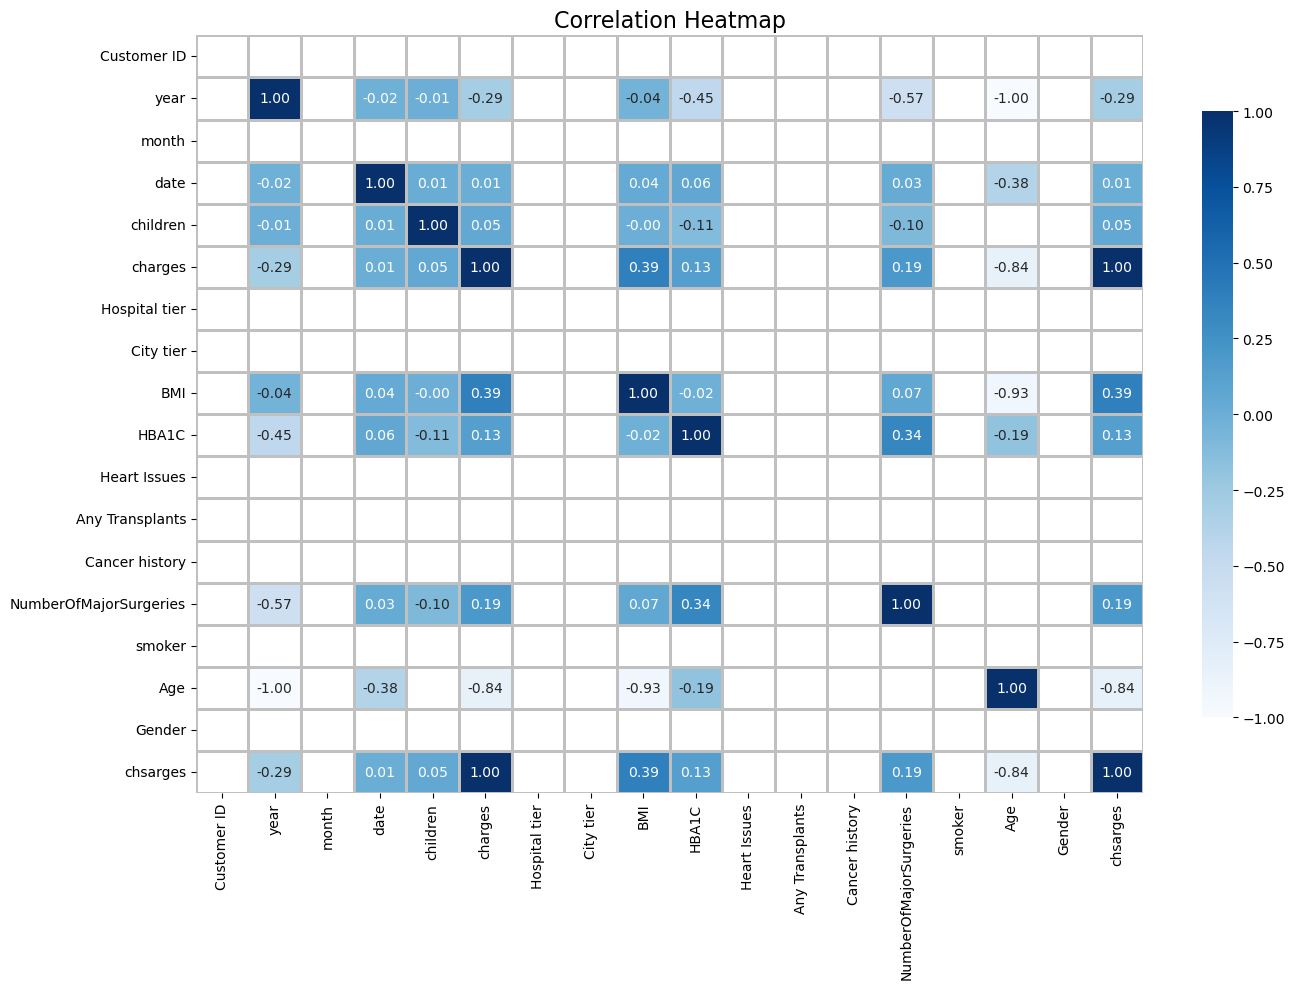

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns and calculate the correlation matrix
numeric_data = df.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

# Set up the figure size
plt.figure(figsize=(14, 10))

# Create the heatmap with customized color palette and borders
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=1, linecolor='#C0C0C0', cbar_kws={'shrink': 0.8}, annot_kws={'size': 10})

# Set title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()  # Adjust layout to avoid clipping

# Show the plot
plt.show()


# Develop Regression Models (Linear and Ridge)


## Steps:
1. Use stratified 5-fold cross-validation:

In [262]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

2. Standardize the dataset using StandardScaler.
3. Use Pipeline to integrate preprocessing and model:

In [263]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))  # Hyperparameter tuning for alpha
])

4. Evaluate the model using cross-validation:

In [270]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Define a pipeline with imputation, scaling, and linear regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by imputing with the mean
    ('scaler', StandardScaler()),                # Standard scaling
    ('model', LinearRegression())                # Linear regression model
])

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(pipeline, X, y, cv=kf, scoring='neg_mean_squared_error')
print('Mean MSE:', -scores.mean())

Mean MSE: 1.615054732111798e-21


/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Customer ID' 'Hospital tier' 'City tier' 'Heart Issues'
 'Any Transplants' 'Cancer history' 'smoker' 'Gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Customer ID' 'Hospital tier' 'City tier' 'Heart Issues'
 'Any Transplants' 'Cancer history' 'smoker' 'Gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/impute/_base.py:577: UserWarning: Skipping features without any observed values: ['Customer ID' 'Hospital tier' 'City tier' 'Heart Issues'
 'Any Transplants' 'Cancer history' 'smoker' 'Gender']. At least one non-missing value is needed for imputation with strategy

3. Gradient Boosting Model

Steps:
Train a Gradient Boosting model (e.g., using XGBoost or GradientBoostingRegressor).

In [272]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

# Fit the model
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [273]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train XGBoost model
model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Model training complete!")

Model training complete!


In [274]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df) 

                   Feature  Importance
16                chsarges    0.987167
4                 children    0.004166
12  NumberOfMajorSurgeries    0.003816
7                      BMI    0.003223
3                     date    0.001183
1                     year    0.000405
8                    HBA1C    0.000039
6                City tier    0.000000
5            Hospital tier    0.000000
9             Heart Issues    0.000000
10         Any Transplants    0.000000
11          Cancer history    0.000000
2                    month    0.000000
13                  smoker    0.000000
14                     Age    0.000000
15                  Gender    0.000000
0              Customer ID    0.000000


In [275]:
# Set a threshold for feature importance
threshold = 0.01  # Example: Remove features with importance < 0.01

# Identify features to keep
important_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Reduce the dataset to only important features
X_reduced = X[important_features]

print(f"Reduced dataset has {X_reduced.shape[1]} features (from {X.shape[1]}).")

Reduced dataset has 1 features (from 17).


In [276]:
print(important_features)

['chsarges']


In [277]:
# Split reduced dataset
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train model with reduced features
model_reduced = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
model_reduced.fit(X_train_reduced, y_train)

# Evaluate performance
y_pred_reduced = model_reduced.predict(X_test_reduced)
print("Model retrained with reduced features!")

Model retrained with reduced features!


1. Threshold Selection: Adjust the threshold based on the dataset and the domain. Features with very low scores (e.g., 0.0) are clear candidates for removal.
2. Regularization Techniques: Using XGBRegressor with regularization (e.g., gamma, lambda) can also help automatically reduce feature importance for less relevant variables.
3. Visualization: You can visualize feature importance for better understanding:

<Axes: title={'center': 'Feature Importance'}, xlabel='Feature'>

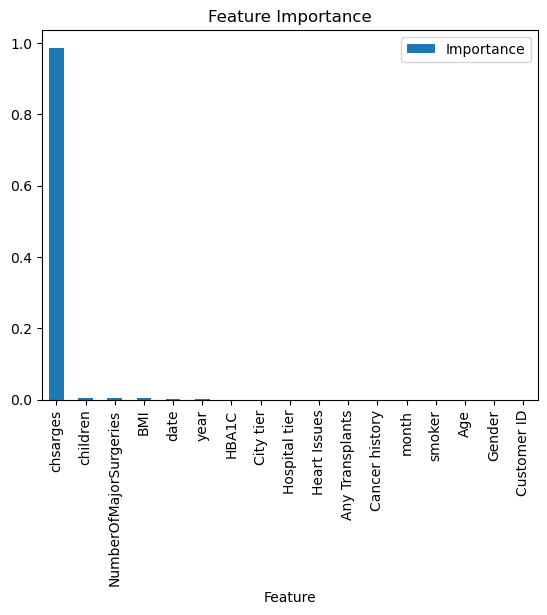

In [278]:
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', title="Feature Importance")

4. Estimate Hospitalization Cost

Input the given details into the model to predict hospitalization costs:

In [285]:
# Assuming you used one-hot encoding during training
# Include all categorical feature transformations
encoded_input = pd.get_dummies(df, columns=['Hospital tier', 'State ID_R1011'], drop_first=True)

# Align input data columns with the training data
encoded_input = encoded_input.reindex(columns=X_train.columns, fill_value=0)

In [286]:
# Predict using the trained model
predicted_cost = model.predict(encoded_input)

print(f"Estimated Hospitalization Cost: {predicted_cost[0]:.2f}")

Estimated Hospitalization Cost: 669.55


In [289]:
encoded_input = pd.get_dummies(df, columns=['Hospital tier', 'State ID_R1012'], drop_first=True)

# Align input data columns with the training data
encoded_input = encoded_input.reindex(columns=X_train.columns, fill_value=0)
predicted_cost = model.predict(encoded_input)

print(f"Estimated Hospitalization Cost: {predicted_cost[0]:.2f}")

Estimated Hospitalization Cost: 669.55


In [290]:
encoded_input = pd.get_dummies(df, columns=['Hospital tier', 'State ID_R1013'], drop_first=True)

# Align input data columns with the training data
encoded_input = encoded_input.reindex(columns=X_train.columns, fill_value=0)
predicted_cost = model.predict(encoded_input)

print(f"Estimated Hospitalization Cost: {predicted_cost[0]:.2f}")

Estimated Hospitalization Cost: 669.55


In [291]:
# Input data for Ms. Jayna
input_data = pd.DataFrame([{
    'Height': 170,
    'Weight': 85,
    'Tier': 'Tier-1',
    'State_ID': 'R1011',
    'HbA1c': 5.8,
    'Smoker': 1,  # 1 for smoker, 0 for non-smoker
    'Diabetic': 0,  # 0 for non-diabetic, 1 for diabetic
    'Transplants': 0,
    'Surgeries': 0,
    'Family_Cancer_History': 1,  # 1 if family cancer history exists
    'Children': 2,
    'Partner': 1,  # 1 if living with a partner
    'Tier-1_Hospital': 1,  # 1 if hospitalization is in Tier-1
    # Add all other features used during training
}])

# Preprocess the input data to match the training features
# Example: One-hot encoding for categorical features
encoded_input = pd.get_dummies(input_data, columns=['Tier', 'State_ID'], drop_first=True)

# Align input columns with training data
encoded_input = encoded_input.reindex(columns=X_train.columns, fill_value=0)

# Predict hospitalization cost
predicted_cost = model.predict(encoded_input)

print(f"Estimated Hospitalization Cost for Ms. Jayna: {predicted_cost[0]:.2f}")

Estimated Hospitalization Cost for Ms. Jayna: 694.81


## Key Considerations
1. Feature Engineering Consistency: Ensure all preprocessing steps used on training data (e.g., scaling, encoding) are applied to the input data.
2. Handle Missing Columns: Use reindex to ensure the input data matches the structure of the training data.
3. Verify Data Types: Ensure all input columns are numeric (float, int).